In [106]:
%matplotlib inline
import sys
sys.path.append("/home/fashionteam/skin-detection")
from skin.a_skinDetection import change_skin
from skin.a_noFaceSkinDetection import obtain_skin_color
import cv2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

['MB1_0.jpg', 'MB2_0.jpg', 'MK1_0.jpg', 'MK2_0.jpg', 'ML1_0.jpg', 'ML2_0.jpg', 'MW1_0.jpg', 'MW2_0.jpg', 'MY1_0.jpg', 'MY2_0.jpg', 'WB1_0.jpg', 'WB2_0.jpg', 'WK1_0.jpg', 'WK2_0.jpg', 'WL1_0.jpg', 'WL2_0.jpg', 'WW1_0.jpg', 'WW2_0.jpg', 'WY1_0.jpg', 'WY2_0.jpg']


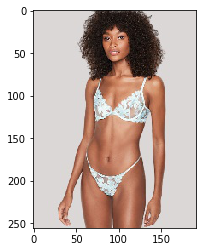

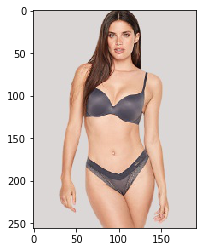

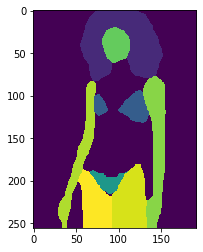

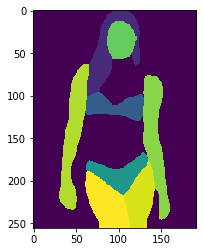

In [117]:
IMGNUM = 10
COLNUM = 17

which_list = ["COLOR", "IMAGE"]
WHICH = which_list[1]

img_path = "/home/fashionteam/Ours/image"
seg_path = "/home/fashionteam/Ours/image-parse"
save_path = "/home/fashionteam/skin-detection/output"
img_list = os.listdir(img_path)
img_list.sort()
print(img_list)


IMG = os.path.join(img_path, img_list[IMGNUM])
IMG_SEG = os.path.join(seg_path, img_list[IMGNUM].split('.')[0] + ".png")
COL = os.path.join(img_path, img_list[COLNUM])
COL_SEG = os.path.join(seg_path, img_list[COLNUM].split('.')[0] + ".png")
SAVE = os.path.join(save_path, img_list[IMGNUM].split('.')[0]+"_to_" + img_list[COLNUM].split('.')[0] + ".jpg")
SAVE1 = os.path.join(save_path, img_list[IMGNUM].split('.')[0]+"_to_" + img_list[COLNUM].split('.')[0] + ".jpg")
SAVE2 = os.path.join(save_path, img_list[IMGNUM].split('.')[0]+"_to_" + img_list[COLNUM].split('.')[0] + ".jpg")
SAVE3 = os.path.join(save_path, img_list[IMGNUM].split('.')[0]+"_to_" + img_list[COLNUM].split('.')[0] + ".jpg")

fig = plt.figure()
imshow(Image.open(IMG))
fig = plt.figure()
imshow(Image.open(COL))
fig = plt.figure()
imshow(Image.open(IMG_SEG))
fig = plt.figure()
imshow(Image.open(COL_SEG))

In [113]:
inputImage = open(IMG, 'rb')
color, upper, lower = obtain_skin_color(COL, COL_SEG, bound = 0.2)

img_color, img_upper, img_lower = obtain_skin_color(IMG, IMG_SEG)
i_color = np.uint8([[img_color]])
i_color = cv2.cvtColor(i_color, cv2.COLOR_HSV2RGB)
i_color = i_color[0][0]
i_color = np.int16(i_color)
print("******color of image: {}*******".format(i_color))

_color = np.uint8([[color]])
_color = cv2.cvtColor(_color, cv2.COLOR_HSV2RGB)
_color = _color[0][0]
_color = np.int16(_color)
print("******color of target: {}*******".format(_color))

check = 0
for i in range(3):
    check += (i_color[i]-_color[i])
print("DIFFERENCE:::: ", check)

if (check > 0): # src is brighter than tar
    if abs(check) < 100: 
        print("1: 0.0")
        color, upper, lower = obtain_skin_color(COL, COL_SEG, bound = 0.0)
    elif abs(check) < 200: 
        print("1: 0.1")
        color, upper, lower = obtain_skin_color(COL, COL_SEG, bound = 0.1)
    else: 
        print("1: 0.2")
        color, upper, lower = obtain_skin_color(COL, COL_SEG, bound = 0.2)
    result = change_skin(inputImage, lower, IMG, IMG_SEG)
elif(check < 0): # tar is brighter than src
    if abs(check) < 100: 
        print("2: 0.0")
        color, upper, lower = obtain_skin_color(COL, COL_SEG, bound = 0.0)
    elif abs(check) < 200: 
        print("2: 0.1")
        color, upper, lower = obtain_skin_color(COL, COL_SEG, bound = 0.1)
    else: 
        print("2: 0.2")
        color, upper, lower = obtain_skin_color(COL, COL_SEG, bound = 0.2)
    result = change_skin(inputImage, upper, IMG, IMG_SEG)
else:
    result = change_skin(inputImage, color, IMG, IMG_SEG)
    
resultFile = open(SAVE, 'wb')
resultFile.write(result)

color, upper, lower = obtain_skin_color(SAVE, IMG_SEG)
_color = np.uint8([[color]])
_color = cv2.cvtColor(_color, cv2.COLOR_HSV2RGB)
_color = _color[0][0]
_color = np.int16(_color)
print("******color of output: {}*******".format(_color))

******color of image: [196 127  97]*******
******color of target: [224 170 143]*******
DIFFERENCE::::  -117
2: 0.1
want_color1: [245 187 158], skin_color: [197 127  97]
******color of output: [246 195 169]*******


In [114]:
"""
print("0.0")
inputImage = open(IMG, 'rb')
color, upper, lower = obtain_skin_color(COL, COL_SEG, bound = 0.0)
if ((i_color[0]+i_color[1]+i_color[2]) > (_color[0]+_color[1]+_color[2])): # src is brighter than tar
    result = change_skin(inputImage, lower, IMG, IMG_SEG)
elif((i_color[0]+i_color[1]+i_color[2]) < (_color[0]+_color[1]+_color[2]) ): # tar is brighter than src
    result = change_skin(inputImage, upper, IMG, IMG_SEG)
else:
    result = change_skin(inputImage, color, IMG, IMG_SEG)
resultFile = open(SAVE, 'wb')
resultFile.write(result)
fig = plt.figure()
imshow(Image.open(SAVE))

fig = plt.figure()
imshow(Image.open(COL))
print("0.1")
inputImage = open(IMG, 'rb')
color, upper, lower = obtain_skin_color(COL, COL_SEG, bound = 0.1)
if ((i_color[0]+i_color[1]+i_color[2]) > (_color[0]+_color[1]+_color[2])): # src is brighter than tar
    result = change_skin(inputImage, lower, IMG, IMG_SEG)
elif((i_color[0]+i_color[1]+i_color[2]) < (_color[0]+_color[1]+_color[2]) ): # tar is brighter than src
    result = change_skin(inputImage, upper, IMG, IMG_SEG)
else:
    result = change_skin(inputImage, color, IMG, IMG_SEG)
resultFile = open(SAVE1, 'wb')
resultFile.write(result)
fig = plt.figure()
imshow(Image.open(SAVE1))

fig = plt.figure()
imshow(Image.open(COL))
print("0.2")
inputImage = open(IMG, 'rb')
color, upper, lower = obtain_skin_color(COL, COL_SEG, bound = 0.2)
if ((i_color[0]+i_color[1]+i_color[2]) > (_color[0]+_color[1]+_color[2])): # src is brighter than tar
    result = change_skin(inputImage, lower, IMG, IMG_SEG)
elif((i_color[0]+i_color[1]+i_color[2]) < (_color[0]+_color[1]+_color[2]) ): # tar is brighter than src
    result = change_skin(inputImage, upper, IMG, IMG_SEG)
else:
    result = change_skin(inputImage, color, IMG, IMG_SEG)
resultFile = open(SAVE2, 'wb')
resultFile.write(result)
fig = plt.figure()
imshow(Image.open(SAVE2))

fig = plt.figure()
imshow(Image.open(COL))
print("0.3")
inputImage = open(IMG, 'rb')
color, upper, lower = obtain_skin_color(COL, COL_SEG, bound = 0.3)
if ((i_color[0]+i_color[1]+i_color[2]) > (_color[0]+_color[1]+_color[2])): # src is brighter than tar
    result = change_skin(inputImage, lower, IMG, IMG_SEG)
elif((i_color[0]+i_color[1]+i_color[2]) < (_color[0]+_color[1]+_color[2]) ): # tar is brighter than src
    result = change_skin(inputImage, upper, IMG, IMG_SEG)
else:
    result = change_skin(inputImage, color, IMG, IMG_SEG)
resultFile = open(SAVE3, 'wb')
resultFile.write(result)
fig = plt.figure()
imshow(Image.open(SAVE3))
fig = plt.figure()
imshow(Image.open(COL))
"""

'\nprint("0.0")\ninputImage = open(IMG, \'rb\')\ncolor, upper, lower = obtain_skin_color(COL, COL_SEG, bound = 0.0)\nif ((i_color[0]+i_color[1]+i_color[2]) > (_color[0]+_color[1]+_color[2])): # src is brighter than tar\n    result = change_skin(inputImage, lower, IMG, IMG_SEG)\nelif((i_color[0]+i_color[1]+i_color[2]) < (_color[0]+_color[1]+_color[2]) ): # tar is brighter than src\n    result = change_skin(inputImage, upper, IMG, IMG_SEG)\nelse:\n    result = change_skin(inputImage, color, IMG, IMG_SEG)\nresultFile = open(SAVE, \'wb\')\nresultFile.write(result)\nfig = plt.figure()\nimshow(Image.open(SAVE))\n\nfig = plt.figure()\nimshow(Image.open(COL))\nprint("0.1")\ninputImage = open(IMG, \'rb\')\ncolor, upper, lower = obtain_skin_color(COL, COL_SEG, bound = 0.1)\nif ((i_color[0]+i_color[1]+i_color[2]) > (_color[0]+_color[1]+_color[2])): # src is brighter than tar\n    result = change_skin(inputImage, lower, IMG, IMG_SEG)\nelif((i_color[0]+i_color[1]+i_color[2]) < (_color[0]+_color[1]+

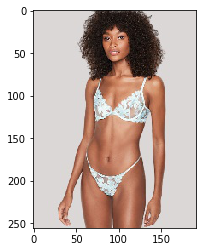

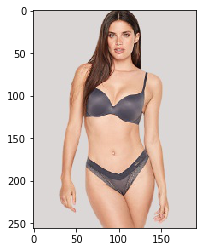

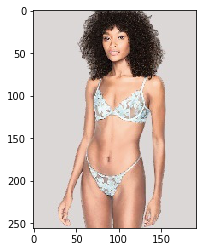

In [115]:
fig = plt.figure()
imshow(Image.open(IMG))
fig = plt.figure()
imshow(Image.open(COL))
fig = plt.figure()
imshow(Image.open(SAVE))

In [116]:
color = [9.0, 101.0, 73.0]
_color = np.uint8([[color]])
_color = cv2.cvtColor(_color, cv2.COLOR_HSV2RGB)
_color = _color[0][0]
_color = np.int16(_color)
print(_color)

[73 53 44]


NameError: name 'test_dataset' is not defined